In [172]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from pandas import DataFrame
import math
import matplotlib.pyplot as plt

# 读入数据所序列
row_data = pd.read_csv("F:/CourseData/数据挖掘/datamining20/trade_new.csv")
df = row_data[["vipno", "pluno", "amt"]]
print(df)

               vipno     pluno     amt
0      2900003115009  22002240    5.06
1      2900001575201  34150006   27.90
2      1591040161114  11054040   33.90
3      1591016439575  27400855    8.00
4      1591015027858  11110121   39.00
5      2900000476042  15110032    5.90
6      1590140305107  27400855    8.00
7      2900000476042  15110032    5.90
8      1590142197076  27400855    8.00
9      2900001436410  15110032    4.90
10     1591016439575  27400855    8.00
11     1591016439575  27400855    8.00
12     1591015454210  32821005   10.00
13     2900001437165  10119081    3.90
14     1590140304506  27400855    8.00
15     1591013766650  10119081    3.90
16     1591014637324  15110032    5.90
17     1590151103907  15110032    4.90
18     1590151103907  15110032    4.90
19     2900000890688  10119081    3.90
20     1591020377344  32821005   15.90
21     2900000353848  10132002    3.90
22     1590142201162  10132002    3.90
23     1590140306678  11110121   39.00
24     2900002936940  148

In [173]:
# keyong 6227002180901670266 6227002180921663895 781924 13325038116
# 把pluno列取为第四级商品编号
df["pluno"] = (df["pluno"]/1000).astype(int)
print(df)

               vipno  pluno     amt
0      2900003115009  22002    5.06
1      2900001575201  34150   27.90
2      1591040161114  11054   33.90
3      1591016439575  27400    8.00
4      1591015027858  11110   39.00
5      2900000476042  15110    5.90
6      1590140305107  27400    8.00
7      2900000476042  15110    5.90
8      1590142197076  27400    8.00
9      2900001436410  15110    4.90
10     1591016439575  27400    8.00
11     1591016439575  27400    8.00
12     1591015454210  32821   10.00
13     2900001437165  10119    3.90
14     1590140304506  27400    8.00
15     1591013766650  10119    3.90
16     1591014637324  15110    5.90
17     1590151103907  15110    4.90
18     1590151103907  15110    4.90
19     2900000890688  10119    3.90
20     1591020377344  32821   15.90
21     2900000353848  10132    3.90
22     1590142201162  10132    3.90
23     1590140306678  11110   39.00
24     2900002936940  14842   16.90
25     2900000353848  10132    3.90
26     2900000353848  10132 

**接下来为聚类数据做准备，先把所有的vip和plu列表整出来，然后这样就可以让一个用户占一行，然后列是每一个商品，也就是我们要进行聚类的维度**

In [183]:
df = df.sort_values(by=["vipno"])
vipno_series = df["vipno"].drop_duplicates()
vipno_series = vipno_series.reset_index(drop=True)
print(vipno_series)
df = df.sort_values(by=["pluno"])
pluno_series = df["pluno"].drop_duplicates()
pluno_series = pluno_series.reset_index(drop=True)
print(pluno_series)
# 分组，求和
group_data = df.groupby(["vipno","pluno"])["amt"].sum()
print(group_data)

0                   781924
1              13325038116
2              13854627199
3              13864739266
4              15954611837
5              15954688237
6              15963883482
7              15963885355
8              18554652702
9              18654692914
10             18764569988
11           1590120464497
12           1590120718170
13           1590130640102
14           1590130817948
15           1590140304209
16           1590140304506
17           1590140305107
18           1590140306678
19           1590140307286
20           1590140307415
21           1590140307767
22           1590140307859
23           1590140308030
24           1590140308214
25           1590141216259
26           1590141414228
27           1590142128124
28           1590142129763
29           1590142148962
              ...         
456          2900002934915
457          2900002936520
458          2900002936940
459          2900002937428
460          2900002937503
461          2900002944402
4

**这里是进行jaccard距离计算的函数，因为最后传入是两个数组，我们要取交集，除以并集**

In [184]:
def jaccard_dist(a, b):
    fenzi = 0
    fenmu = 0
    for i in range(a.size):
        fenzi += min(a[i],b[i])
        fenmu += max(a[i],b[i])
    return 1-(fenzi/fenmu)

**把每一个amt塞到横轴为用户，纵轴为商品的大表格里面**

In [186]:
data = DataFrame(0, columns=pluno_series, index=vipno_series)
# print(data)
for i in df.index:
    vipno = df['vipno'][i]
    pluno = df['pluno'][i]
    amt = group_data[vipno][pluno]
    if math.isnan(data[pluno][vipno]):
        data[pluno][vipno] = amt
    else:
        data[pluno][vipno] += amt

In [187]:
print(data)

pluno                10000  10001  10002  10008  10100  10101  10102  10103  \
vipno                                                                         
781924                   0      0      0      0      0      0      0      0   
13325038116              0      0      0      0      0      0      0      0   
13854627199              0      0      0      0      0      0      0      0   
13864739266              0      0      0      0      0      0      0      0   
15954611837              0      0      0      0      0      0      0      0   
15954688237              0      0      0      0      0      0      0     11   
15963883482              2      0      8      0      0      0      0      0   
15963885355              0      0      0      0      0      0      0      0   
18554652702              0      0      0      0      0      0      0      0   
18654692914              0      0      0      0      0      0      0      0   
18764569988              0      0      0      0     

**下面是DBSCAN算法，由于距离计算函数不是欧式距离，所以要自己改成jaccard距离**

In [188]:
# visitlist类用于记录访问列表
# unvisitedlist记录未访问过的点
# visitedlist记录已访问过的点
# unvisitednum记录访问过的点数量
class visitlist:
    def __init__(self, count=0):
        self.unvisitedlist=[i for i in range(count)]
        self.visitedlist=list()
        self.unvisitednum=count

    def visit(self, pointId):
        self.visitedlist.append(pointId)
        self.unvisitedlist.remove(pointId)
        self.unvisitednum -= 1

In [189]:
def my_dbscanl(dataSet, eps, minPts):
    # numpy.ndarray的 shape属性表示矩阵的行数与列数
    nPoints = dataSet.shape[0]
    # (1)标记所有对象为unvisited
    # 在这里用一个类vPoints进行买现
    vPoints = visitlist(count=nPoints)
    # 初始化簇标记列表C,簇标记为 k
    k = -1
    C = [-1 for i in range(nPoints)]
    while(vPoints.unvisitednum > 0):
        # (3)随机上选择一个unvisited对象p
        p = random.choice(vPoints.unvisitedlist)
        # (4)标记p为visited
        vPoints.visit(p)
        # (5)if p的$\varepsilon$-邻域至少有MinPts个对象
        # N是p的$\varepsilon$-邻域点列表
        N = [i for i in range(nPoints) if jaccard_dist(dataSet.values[i,:], dataSet.values[p,:])<= eps]
#         print(len(N))
        if  len(N) >= minPts:
            # (6)创建个新簇C，并把p添加到C
            # 这里的C是一个标记列表，直接对第p个结点进行赋植
            k += 1
            C[p]=k
            # (7)令N为p的ε-邻域中的对象的集合
            # N是p的$\varepsilon$-邻域点集合
            # (8) for N中的每个点p'
            for p1 in N:
                # (9) if p'是unvisited
                if p1 in vPoints.unvisitedlist:
                    # (10)标记p’为visited
                    vPoints.visit(p1)
                    # (11) if p'的$\varepsilon$-邻域至少有MinPts个点，把这些点添加到N
                    # 找出p'的$\varepsilon$-邻域点，并将这些点去重添加到N
                    M=[i for i in range(nPoints) if jaccard_dist(dataSet.values[i,:], \
                        dataSet.values[p1,:]) <= eps]
                    if len(M) >= minPts:
                        for i in M:
                            if i not in N:
                                N.append(i)
                    # (12) if p'还不是任何簇的成员，把P'添加到C
                    # C是标记列表，直接把p'分到对应的簇里即可
                    if  C[p1] == -1:
                        C[p1]= k
        # (15)else标记p为噪声
        else:
            C[p]=-1

    # (16)until没有标t己为unvisitedl内对象
    return C

In [190]:
def getCentroid(dataSet):
    div = len(dataSet)
    return sum(dataSet)/div

In [191]:
def CP(label, dataSet):
    centroids = []
    k = max(label) + 1
    if k > 1:
        print(k)
        for i in range(1, k):
            data = []
            for j in range(len(label)):
                if label[j] == i:
                    data.append(dataSet.values[j,:])
            centroids.append(getCentroid(data))
        cpnum = 0
        for i in range(1, k):
            distance = 0
            num = 0
            for j in range(len(label)):
                if label[j] == i:
                    distance += jaccard_dist(dataSet.values[j,:],centroids[i - 1])
                    num += 1
            cpnum += distance/num
        return cpnum / (k - 1)
    else:
        return 0

In [192]:
def getSC(dataSet, label):
    sum_number = 0
    k = len(label)
    for i in range(k):
        ai = 0
        bi = 0
        anum = 0
        bnum = 0
        for j in range(k):
            if label[i]==label[j]:
                ai += jaccard_dist(dataSet.values[i,:],dataSet.values[j,:])
                anum += 1
            else:
                bi += jaccard_dist(dataSet.values[i,:],dataSet.values[j,:])
                bnum += 1
        if anum == 0:
            ai = 0
        else: 
            ai = ai / anum
        if bnum == 0:
            bi = 0
        else: 
            bi = bi / anum
        sum_number += (bi - ai) / max(ai, bi)     
    return sum_number / k

In [194]:
# 调节eps值
sc_cp_label = []
for i in np.arange(0.65, 0.9, 0.05):
    label = my_dbscanl(data, i, 5)
    print(label)
    sc = getSC(data, label)
    cp = CP(label, data)
    sc_cp_label.append((sc, cp))

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

In [199]:
label = my_dbscanl(data, 0.9, 5)
sc = getSC(data, label)
cp = CP(label, data)
sc_cp_label.append((sc, cp))

In [200]:
print(sc_cp_label)

[(-0.9385051148529608, 0), (-0.8403103059471948, 0.5247942924251472), (-0.682266656934556, 0.4634830203898604), (-0.25570746272895106, 0.623508064238061), (0.10331093501025589, 0.7587009733259968), (-0.6221851902896466, 0)]


In [201]:
scdf = DataFrame(sc_cp_label,index=np.arange(0.65, 0.95, 0.05))
scdf

,0,1
0.65,-0.938505,0.000000
0.70,-0.840310,0.524794
0.75,-0.682267,0.463483
0.80,-0.255707,0.623508
0.85,0.103311,0.758701
0.90,-0.622185,0.000000


SC指数变化趋势


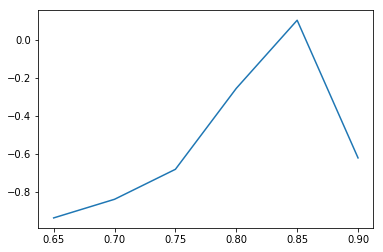

In [202]:
print("SC指数变化趋势")
plt.plot(scdf[0])

CP指数变化趋势


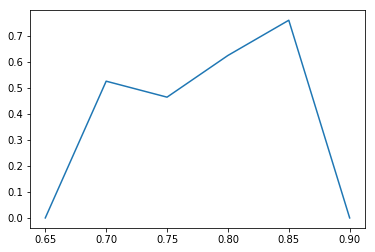

In [203]:
print("CP指数变化趋势")
plt.plot(scdf[1])